In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [92]:
tweet_sentiment_df = pd.read_csv('all_days.csv')
mean_finance_df = pd.read_csv('mean_finance.csv')

In [93]:
mean_finance_df = mean_finance_df.set_index('Date').rename(columns ={'mean':'agg_stock_percent_change'})

In [94]:
tweet_sentiment_df = tweet_sentiment_df.T

In [95]:
tweet_sentiment_df['total'] =  tweet_sentiment_df[0]+tweet_sentiment_df[1]+tweet_sentiment_df[2]
tweet_sentiment_df['percentange_positive_tweets'] = tweet_sentiment_df[2]/tweet_sentiment_df['total']*100
tweet_sentiment_df['percentange_negative_tweets'] = tweet_sentiment_df[0]/tweet_sentiment_df['total']*100

In [96]:
tweet_sentiment_df = tweet_sentiment_df.rename(columns ={0:'negative_tweets',1:'neutral_tweets',2:'positive_tweets'})

In [97]:
tweet_sentiment_df.head(10)

,negative_tweets,neutral_tweets,positive_tweets,total,percentange_positive_tweets,percentange_negative_tweets
2009-04-06,998,1831,2171,5000,43.42,19.96
2009-04-07,976,1819,2205,5000,44.10,19.52
2009-04-17,833,1789,2378,5000,47.56,16.66
2009-04-18,904,1855,2241,5000,44.82,18.08
2009-04-19,877,1882,2241,5000,44.82,17.54
2009-04-20,916,1775,2309,5000,46.18,18.32
2009-04-21,918,1782,2300,5000,46.00,18.36
2009-05-01,942,1777,2281,5000,45.62,18.84
2009-05-02,827,1839,2334,5000,46.68,16.54
2009-05-03,925,1817,2258,5000,45.16,18.50


In [98]:
joined_df = mean_finance_df.join(tweet_sentiment_df, how='inner')

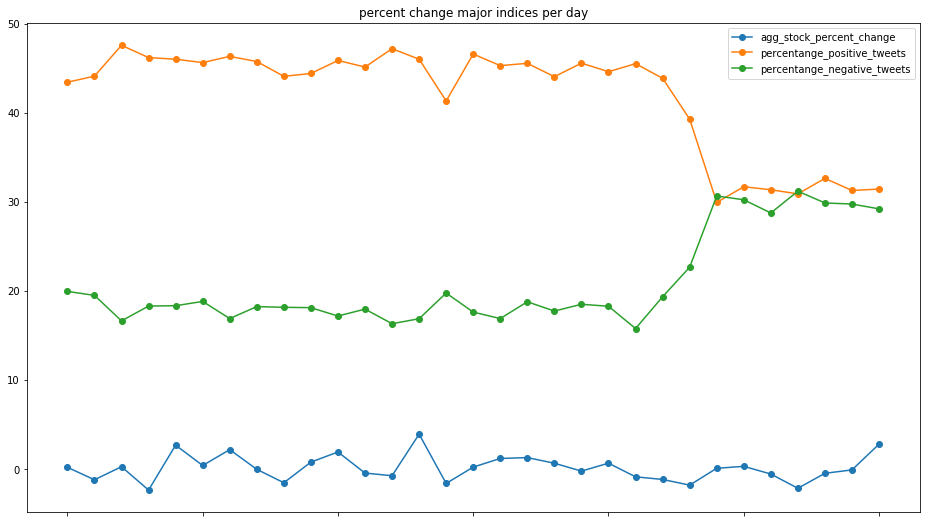

In [111]:
joined_df
# correlation between positive and stock change
df = joined_df[['agg_stock_percent_change','percentange_positive_tweets','percentange_negative_tweets']]
df.plot(figsize=(16,9),title="percent change major indices per day",linestyle='-', marker='o')

In [124]:
r1 = df['agg_stock_percent_change'].corr(df['percentange_positive_tweets'],method='spearman')
r2 = df['agg_stock_percent_change'].corr(df['percentange_negative_tweets'],method='spearman')
r1,r2
# (0.2972073812865935, -0.2917632840717102)

(0.2972073812865935, -0.2917632840717102)

In [130]:
# http://www.sthda.com/english/wiki/correlation-test-between-two-variables-in-r
N = len(joined_df)
def t_value(rs,n):
    return rs/pow(1-rs**2,0.5)*pow(n-2,0.5)
t_r1 = t_value(r1,N) 
t_r2 = t_value(r2,N) 
t_r1,t_r2
# (1.676255781274544, -1.642664799482453)

(1.676255781274544, -1.642664799482453)

In [136]:
# pvalue 
from scipy import stats
import numpy as np
pval1 = stats.t.sf(np.abs(t_r1), N-2)  # one-sided pvalue = Prob(abs(t)>t
pval2 = stats.t.sf(np.abs(t_r2), N-2)  # one-sided pvalue = Prob(abs(t)>t
pval1,pval2

(0.052218957432438755, 0.05562661922565244)

In [134]:
# since p > 0.05 in both instances we cannot reject the null hypthesis

AttributeError: module 'pandas' has no attribute 'ols'